In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, eV
from numpy import linalg

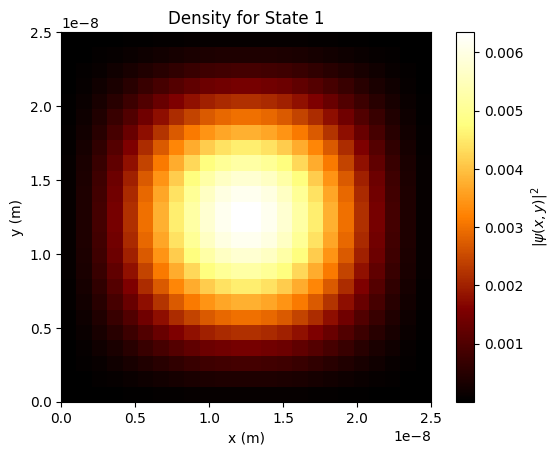

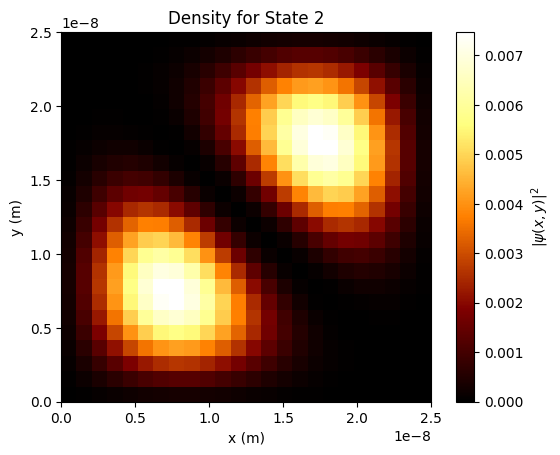

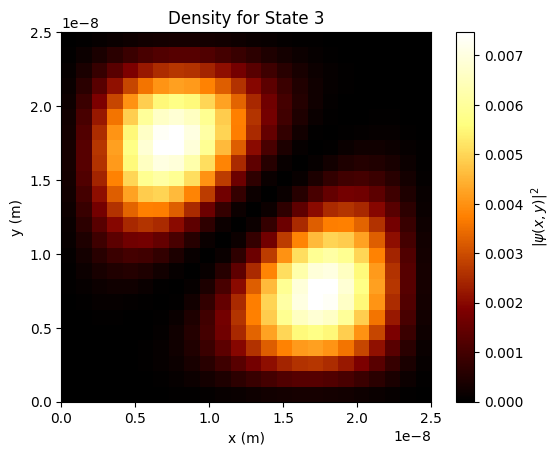

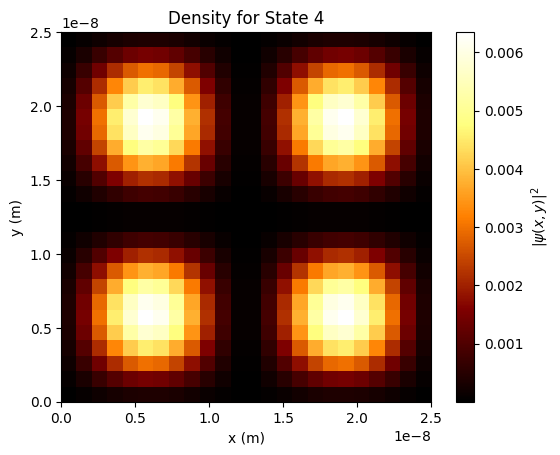

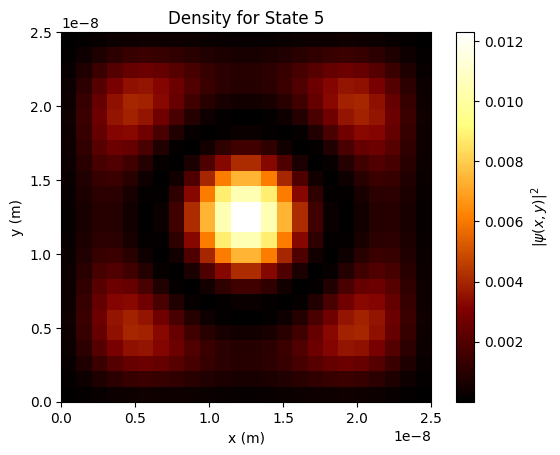

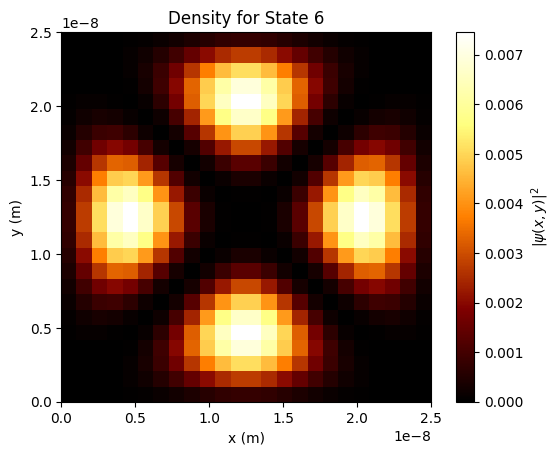

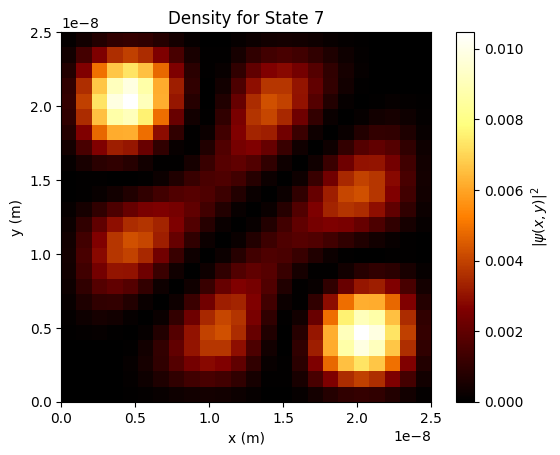

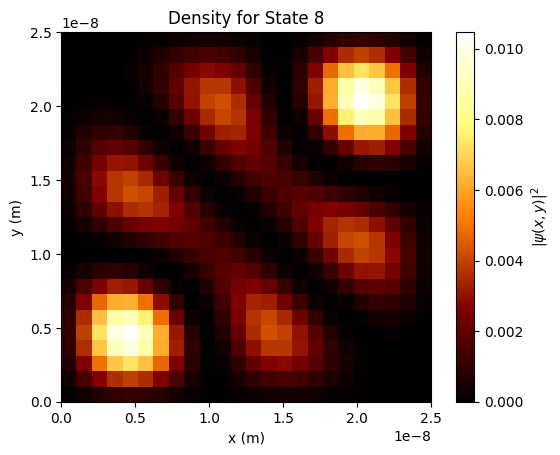

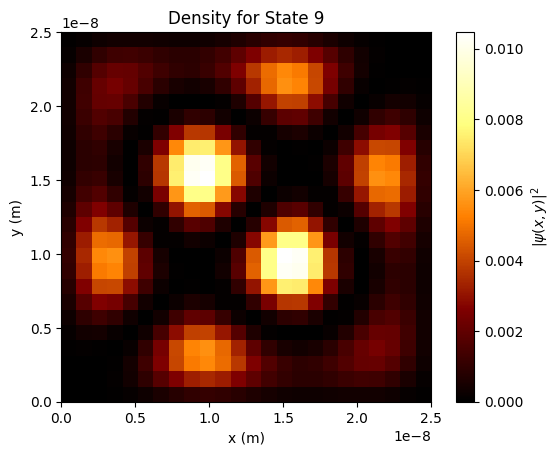

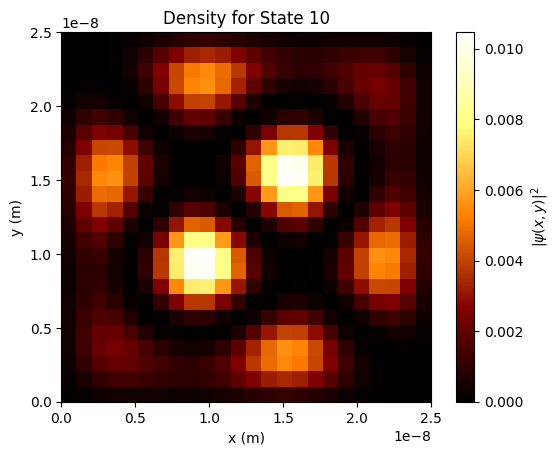

In [3]:
def Hamiltonian_create(m_eff, Lx, Ly, Nx, Ny, U):
    ax = Lx / (Nx - 1)
    ay = Ly / (Ny - 1)
    Mx = Nx - 2  # Exclude boundaries
    My = Ny - 2  # Exclude boundaries
    M = My * Mx  # Total number of interior points

    tx = hbar**2 / (2 * m_eff * ax**2)
    ty = hbar**2 / (2 * m_eff * ay**2)

    # Hamiltonian matrix
    matrix = np.zeros((M, M))

    for j in range(My):
        for i in range(Mx):
            n = i + j * Mx  # Correct 1D index for (i, j) in the grid
            matrix[n, n] = 2 * (tx + ty) + U[j+1, i+1]  # Add potential

            if i > 0:  # Left neighbor
                matrix[n, n - 1] = -tx
            if i < Mx - 1:  # Right neighbor
                matrix[n, n + 1] = -tx
            if j > 0:  # Below neighbor
                matrix[n, n - Mx] = -ty
            if j < My - 1:  # Above neighbor
                matrix[n, n + Mx] = -ty

    # Solve eigenvalue problem
    eigenvalues, eigenvectors = linalg.eigh(matrix)
    index = eigenvalues.argsort()
    eigenvalues = eigenvalues[index]
    eigenvectors = eigenvectors[:, index]

    return eigenvalues, eigenvectors, matrix


def wavefunction(eigenvectors, Nx, Ny, num_states):
    Mx = Nx - 2
    My = Ny - 2
    eigenstates = np.zeros((My, Mx, num_states))

    for k in range(num_states):  # Loop over states
        for j in range(My):  # Loop over grid rows
            for i in range(Mx):  # Loop over grid columns
                n = i + j * Mx  # Map 2D to 1D index
                eigenstates[j, i, k] = eigenvectors[n, k]

    return eigenstates

# Grid parameters
Nx = 26
Ny = 26
Lx = 25e-9
Ly = 25e-9
m_eff = 0.1 * m_e
U = np.zeros((Ny, Nx))  # Potential (zero in this case)

# Solve eigenvalue problem
eigenvalues, eigenvectors, matrix = Hamiltonian_create(m_eff, Lx, Ly, Nx, Ny, U)

# Extract wavefunctions
num_states = 10  # First 6 eigenstates
U = wavefunction(eigenvectors, Nx, Ny, num_states)
U_sq = np.square(np.abs(U))  # Compute density

# Visualize each state
for i in range(num_states):
    plt.imshow(U_sq[:, :, i], cmap='afmhot', origin='lower', extent=(0, Lx, 0, Ly))
    plt.colorbar(label=r'$|\psi(x,y)|^2$')
    plt.title(f'Density for State {i+1}')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.savefig(f'Density{i+1}.png', dpi=200)
    plt.show()

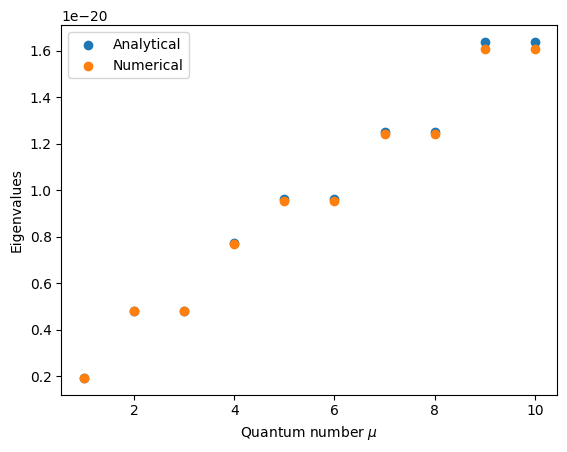

In [8]:
def energy(n_x, n_y, hbar, m, Lx, Ly):
    return (hbar**2 * np.pi**2 / (2 * m * Lx**2)) * (n_x**2) + (hbar**2 * np.pi**2 / (2 * m * Ly**2)) * (n_y**2)

# Quantum numbers for the first 10 eigenvalues
quantum_numbers = [(1, 1), (1, 2), (2, 1), (2, 2), (1, 3),
                   (3, 1), (2, 3), (3, 2), (1, 4), (4, 1)]

# Compute eigenvalues
eigenvalues1 = [energy(n_x, n_y, hbar, m_eff, Lx, Ly) for n_x, n_y in quantum_numbers]

# Output results


plt.scatter(np.arange(1, 11, 1), eigenvalues1, label="Analytical")
plt.scatter(np.arange(1, 11, 1), eigenvalues[0:10], label="Numerical")
plt.xlabel(r"Quantum number $\mu$")
plt.ylabel("Eigenvalues")
plt.legend()
plt.savefig("analytical_vs_simulation.png", dpi=200)
plt.show()

In [9]:
print("Analytical: ", eigenvalues1)
print("Numerical: ", eigenvalues[0:10])

Analytical:  [1.927893568716023e-21, 4.819733921790057e-21, 4.819733921790057e-21, 7.711574274864091e-21, 9.639467843580114e-21, 9.639467843580114e-21, 1.2531308196654148e-20, 1.2531308196654148e-20, 1.6387095334086192e-20, 1.6387095334086192e-20]
Numerical:  [1.92535790e-21 4.79821272e-21 4.79821272e-21 7.67106755e-21
 9.53593678e-21 9.53593678e-21 1.24087916e-20 1.24087916e-20
 1.60638133e-20 1.60638133e-20]


In [10]:
m_eff=0.918*m_e
T=300 #K
U_0=200e-3*eV
Lx=8e-9
Ly=16e-9
Nx=21
Ny=41

b=Lx/2
c=Ly/2
K=np.pi/Lx

U=np.zeros((Nx-2, Ny-2))

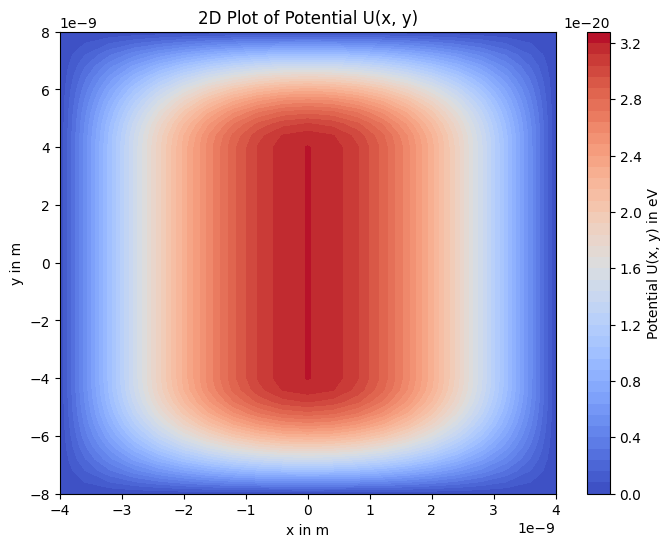

In [12]:
# Define the Y(y) function
def Y(y):
    if (-c <= y < -c + b):
        return np.sin(K * (c + y))
    elif (-c + b <= y < c - b):
        return 1
    elif (c - b <= y < c):
        return np.sin(K * (c - y))
    else:
        return 0

# Generate x and y coordinates
x = np.linspace(-b, b, 21)
y = np.linspace(-c, c, 41)
x, y = np.meshgrid(x, y)

# Compute U(x, y)
Y_values = np.array([Y(yi) for yi in y[:, 0]])  # Apply Y to each y value
U = U_0 * np.cos(K * x) * Y_values[:, None]     # Use broadcasting for the 2D grid

# Plot the 2D heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.contourf(x, y, U, levels=50, cmap='coolwarm')  # Heatmap with colors
plt.colorbar(heatmap, label='Potential U(x, y) in eV')
plt.title('2D Plot of Potential U(x, y)')
plt.xlabel('x in m')
plt.ylabel('y in m')
plt.savefig("Potential.png", dpi=200)
plt.show()

In [15]:
eigenvalues, eigenvectors, matrix = Hamiltonian_create(m_eff, Lx, Ly, Nx, Ny, U)
eigenvalues[:8]

array([1.91963705e-20, 1.91986732e-20, 1.98230543e-20, 1.98275035e-20,
       2.28467071e-20, 2.30310765e-20, 2.40896481e-20, 2.44463071e-20])

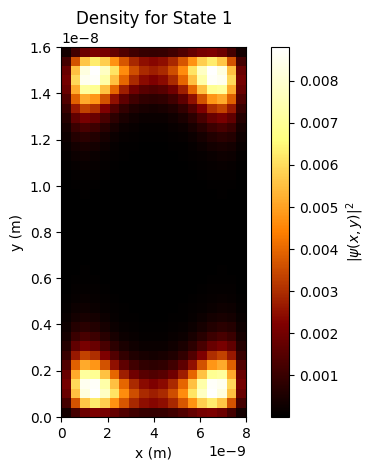

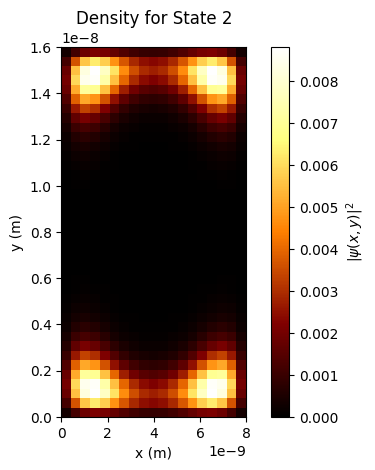

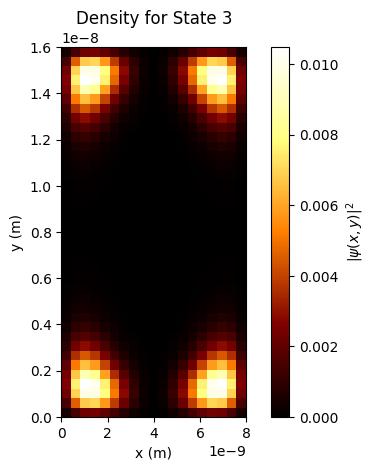

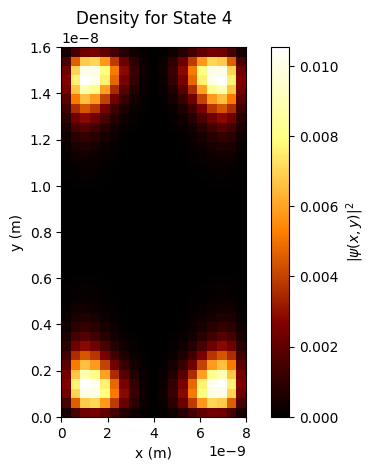

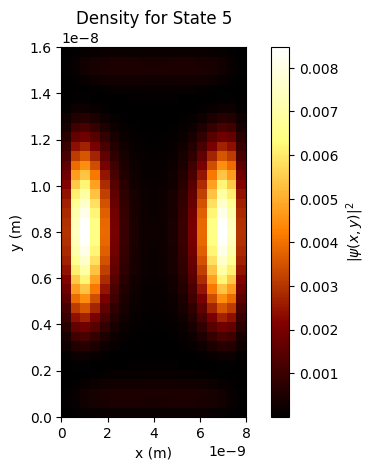

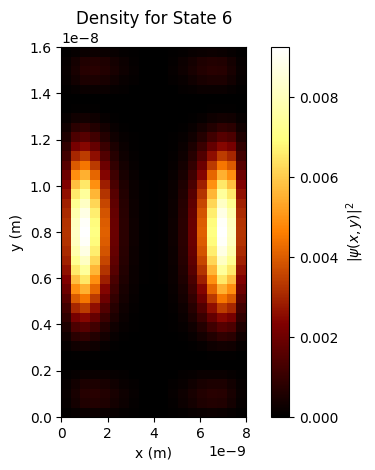

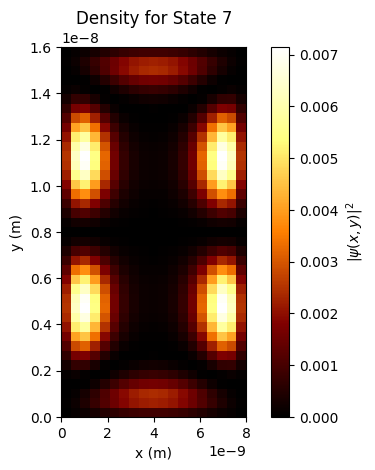

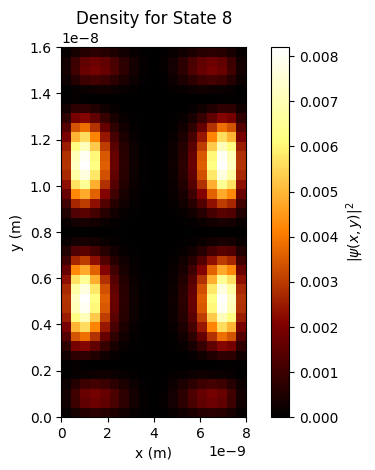

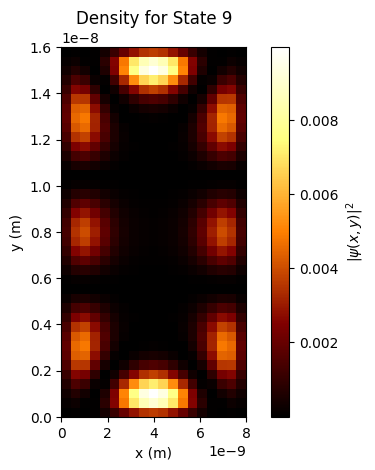

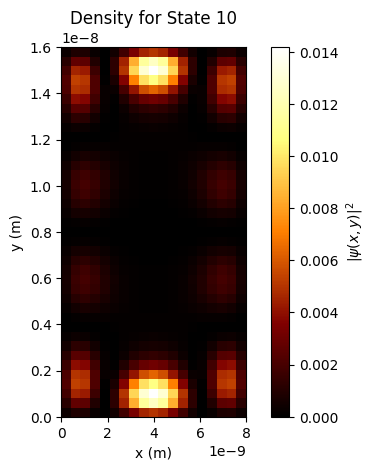

In [16]:
num_states = 10  # First 6 eigenstates
U = wavefunction(eigenvectors, Nx, Ny, num_states)
U_sq = np.square(np.abs(U))  # Compute density

# Visualize each state
for i in range(num_states):
    plt.imshow(U_sq[:, :, i], cmap='afmhot', origin='lower', extent=(0, Lx, 0, Ly))
    plt.colorbar(label=r'$|\psi(x,y)|^2$')
    plt.title(f'Density for State {i+1}')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.savefig(f'DensityNanowire{i+1}.png', dpi=200)
    plt.show()

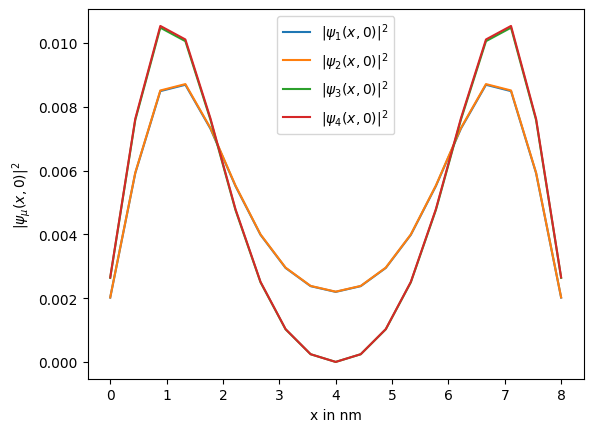

In [21]:
plt.plot(np.linspace(0, 8, 19), U_sq[3, :, 0], label=r"$|\psi_1(x, 0)|^2$")
plt.plot(np.linspace(0, 8, 19), U_sq[3, :, 1], label=r"$|\psi_2(x, 0)|^2$")
plt.plot(np.linspace(0, 8, 19), U_sq[3, :, 2], label=r"$|\psi_3(x, 0)|^2$")
plt.plot(np.linspace(0, 8, 19), U_sq[3, :, 3], label=r"$|\psi_4(x, 0)|^2$")
plt.xlabel("x in nm")
plt.ylabel(r"$|\psi_\mu(x, 0)|^2$")
plt.legend()
plt.savefig("potential_nanowire.png", dpi=200)
plt.show()